# Part 1:

1) Give 1 real world example for:
   - Binary Classification Task
   - Multiclass Classification Task
   - Regression Task

**Answer**:
- Binary classification - determining if a person has heart-related diseases based on health data like avg heart rate, age, level of holesterol, weight, height, etc.
- Multiclass classification - recognizing hand-written digits
- Regression task - predicting stock prices based on previous trends in prices

2)
Classifying into 2 classes, a model produces the following outputs:


| $y_i$     |               $\hat{y_i}$                                  |
|---------|----------------------------------------------------------|
| 1       | 0.9 |
| 1       | 0.4 |
| 0       | 0.3 |
| 0       | 0.6 |

Calculate the binary cross-entropy loss.



$$y(\theta)={1\over n}\sum^n_{i=1}[y_ilog(\hat{y_i}) + (1-y_1)log(1-\hat{y_i})] =
\\ (1*log(0.9) + (1-1)log(1-0.9)) + (1*log(0.4)+(1-1)log(1-0.4)) + (0*log(0.3) + (1-0)*log(1-0.3)) + (0*log(0.6) + (1-0)*log(1-0.6)) = 
\\$$

**Answer**: The result is **0.57365**

3) While improving a model complexity, if you notice that a model's training error is decreasing but the test error is getting higher, what does this indicate about the model's behavior?

**Answer:** This behaviour indicates that the model is **overfitted**

4. Suppose we have a dataset with categorical targets $Y = ${$1, ..., K$}. 

Let $n_k$ be the size of the $k$-th category :

$$
n_k = \sum_{i=1}^{n} \mathbb{I}[y_i = k], \quad \sum_{k=1}^{K} n_k = n.
$$

Consider a dummy model which always predicts category $l$, $1<l<K$. What is the value of the error rate ? For which $l$
 it is minimal?


**Answer**: the mode of the dataset

5. The MSE for a constant model $f_\theta(x_i) = c$ is given by : 

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - c)^2.
$$

Find the constant $c$ that minimizes the MSE.

**Answer:** the mean of the dataset (proof provided on paper) 

# Part 2:

### Step 1 : Generate synthetic data (Y) following any type of distributions.


In [44]:
import numpy as np
import matplotlib.pyplot as plt

synth_size = 2000

data = np.random.standard_normal(synth_size)
data

array([ 0.70079754,  0.74703159, -0.13851329, ..., -1.44427781,
       -0.42502152,  0.9951247 ], shape=(2000,))

### Step 2 : Define a function to compute MSE


In [45]:
def mean_squared_error_const_model(l, Y_actual: np.array):
    n = Y_actual.shape
    return ((np.full(n, l) - Y_actual)**2).mean()


### Step 3 : Find the optimal c, compare it to the mean of you synthetic dataset


In [46]:
c = np.mean(data)
c

#c is the mean of the dataset and also is the optimal c

np.float64(-0.028127393136036734)

### Step 4 : Plot the MSE curve and the optimal c

(array([0.00681854, 0.        , 0.00227285, 0.00909138, 0.02272845,
        0.03863837, 0.05909397, 0.08636811, 0.10909656, 0.21819313,
        0.19773752, 0.22273882, 0.33638107, 0.40456642, 0.40911211,
        0.37274659, 0.38411081, 0.38865651, 0.31592546, 0.26365003,
        0.19546468, 0.17728191, 0.11818794, 0.08636811, 0.03863837,
        0.03181983, 0.02045561, 0.01818276, 0.00454569, 0.00681854]),
 array([-3.42434397, -3.20435537, -2.98436677, -2.76437817, -2.54438957,
        -2.32440097, -2.10441237, -1.88442377, -1.66443518, -1.44444658,
        -1.22445798, -1.00446938, -0.78448078, -0.56449218, -0.34450358,
        -0.12451498,  0.09547362,  0.31546221,  0.53545081,  0.75543941,
         0.97542801,  1.19541661,  1.41540521,  1.63539381,  1.85538241,
         2.07537101,  2.2953596 ,  2.5153482 ,  2.7353368 ,  2.9553254 ,
         3.175314  ]),
 <BarContainer object of 30 artists>)

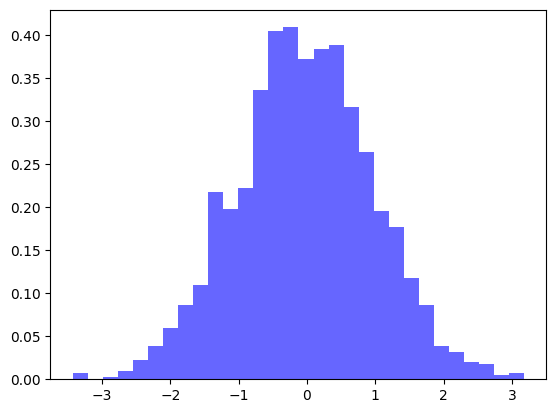

In [47]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')


In [48]:
possible_c_array = np.arange(-3, 3, 0.01) #values from -3 to 3 with a step of 0.1
mse_array = np.array([(x, mean_squared_error_const_model(x, data)) for x in possible_c_array])


mse_array

array([[-3.        ,  9.8064229 ],
       [-2.99      ,  9.74708545],
       [-2.98      ,  9.687948  ],
       ...,
       [ 2.97      ,  9.96316398],
       [ 2.98      , 10.02322653],
       [ 2.99      , 10.08348907]], shape=(600, 2))

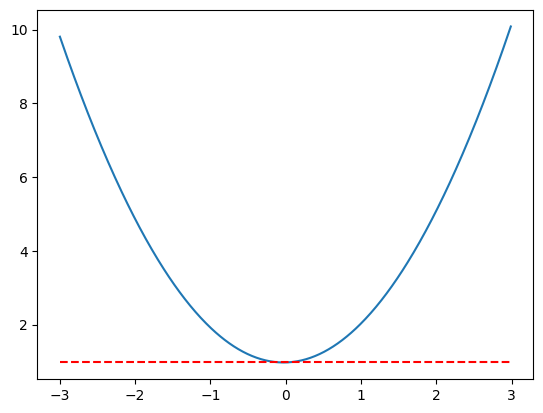

In [49]:
minimum_mse = mean_squared_error_const_model(c, data) #mse when we const predict the mean

plt.plot(mse_array[:, 0], mse_array[:, 1], label='Mean Squared Error')
plt.plot([mse_array[0, 0], mse_array[-1, 0]], [minimum_mse, minimum_mse],'r--',label='mean')

plt.show()

As we can we, the mean is indeed the best solution to finding an optimal $c$ for a constant model.

# Part 3 : 

Write your own implementation of splitting the dataset on train and test using shuffling:

In [50]:
def train_test_split(X: np.array, y: np.array, test_size=0.2):
    """
    Split the dataset into training and testing sets.

    Parameters:
    X (numpy array): The feature matrix.
    y (numpy array): The target labels.
    test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    X_train (numpy array): The training feature matrix.
    X_test (numpy array): The testing feature matrix.
    y_train (numpy array): The training labels.
    y_test (numpy array): The testing labels.
    """
    if len(X) < 1 or len(y) < 1:
        return np.array([]), np.array([]), np.array([]), np.array([])

    X = np.array(X)
    y = np.array(y)

    n_samples = len(X)
    test_size_num = int(n_samples * test_size)

    indices = np.arange(n_samples)
    np.random.shuffle(indices)  
    
    test_indices = indices[:test_size_num]
    train_indices = indices[test_size_num:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test


# Example Usage
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Run the following tests to ensure that your implementation works as expected. <br>
<strong>Don't modify the cells</strong>!

In [51]:
def test_basic_split():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the correct number of samples is in the train and test sets
    assert len(X_train) == 3, f"Expected 3 training samples, got {len(X_train)}"
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    assert len(y_train) == 3, f"Expected 3 training labels, got {len(y_train)}"
    assert len(y_test) == 1, f"Expected 1 test label, got {len(y_test)}"
    
    print("Basic split test passed.")

In [52]:
def test_empty_dataset():
    X = []
    y = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the splits are empty
    assert len(X_train) == 0, f"Expected 0 training samples, got {len(X_train)}"
    assert len(X_test) == 0, f"Expected 0 test samples, got {len(X_test)}"
    assert len(y_train) == 0, f"Expected 0 training labels, got {len(y_train)}"
    assert len(y_test) == 0, f"Expected 0 test labels, got {len(y_test)}"
    
    print("Empty dataset test passed.")

In [53]:
def test_different_test_size():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    # Test with 50% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    assert len(X_test) == 2, f"Expected 2 test samples, got {len(X_test)}"
    
    # Test with 25% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    
    print("Different test_size values test passed.")

In [54]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

def test_real_dataset():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Check the size of the train and test sets
    assert len(X_train) == 105, f"Expected 105 training samples, got {len(X_train)}"
    assert len(X_test) == 45, f"Expected 45 test samples, got {len(X_test)}"
    
    print("Real dataset test passed.")


In [55]:
def run_tests():
    test_basic_split()
    test_empty_dataset()
    test_different_test_size()
    test_real_dataset()

run_tests()

Basic split test passed.
Empty dataset test passed.
Different test_size values test passed.
Real dataset test passed.
